In [2]:
import json
def getData(path="./out.json") -> dict:
    me={}
    with open(path, "r") as f:
        me=json.loads(f.read())
    return me
data=getData()

In [3]:
data["EEGData"][0]

{'timestamp': 1659275046650,
 'gametime': 43.48576,
 'OrdinaryDataFlag': True,
 'DataType': 'ExtendedBrainInfo',
 'data': {'MainTimestamp': 1659274975.4716277,
  'SeqTimestamp': 1659274974.937358,
  'SeqNumber': 0,
  'MainIterationSeqNum': 0,
  'ChannelData': [0.12408857036692743,
   0.13643853502732933,
   0.08592614065720328,
   0.05122908070434102,
   0.14822849908214797,
   0.1050032874945745,
   0.1875,
   0.0],
  'LastSensorData': {'AF3': True,
   'AF4': True,
   'Fp1': True,
   'Fp2': True,
   'AF7': True,
   'AF8': True}}}

In [4]:
# Basic Information of Raw data
from datetime import datetime, timedelta
def TimeConverter(ms=0,sec=0):
    epoch = datetime(1970, 1, 1)
    return epoch+timedelta(seconds=sec, milliseconds=ms)+timedelta(hours=9)
print("raw SeqTimestamp:", data["EEGData"][0]["data"]["SeqTimestamp"])
firstdate=TimeConverter(sec=data["EEGData"][0]["data"]["SeqTimestamp"])
lastdate=TimeConverter(sec=data["EEGData"][len(data["EEGData"])-1]["data"]["SeqTimestamp"])
print("First item timestamp", firstdate)
print("Last item timestamp", lastdate)
print("Data Time length:",lastdate-firstdate)
print("Data length:", len(data["EEGData"]))
print("Data num/time legth(seconds) -> Avg.Frequency:",len(data["EEGData"])/(lastdate-firstdate).seconds)
timetable=[TimeConverter(sec=i["data"]["SeqTimestamp"]) for i in data["EEGData"]]
print("Invalid data length:",len([i["OrdinaryDataFlag"] for i in data["EEGData"] if i["OrdinaryDataFlag"]==False]))
sensordata=[i["data"]["LastSensorData"] for i in data["EEGData"]]
sensorfalsed=[i for i in sensordata if False in i.values()]
print("Sensor falsed data length:",len(sensorfalsed))

raw SeqTimestamp: 1659274974.937358
First item timestamp 2022-07-31 22:42:54.937358
Last item timestamp 2022-07-31 22:44:06.221180
Data Time length: 0:01:11.283822
Data length: 35588
Data num/time legth(seconds) -> Avg.Frequency: 501.23943661971833
Invalid data length: 0
Sensor falsed data length: 0


In [5]:
eeg=data["EEGData"]
'''
Return indicates time and count, count will be counted starting from time until time+1 second
'''
def TimeIntervalTable(raw :dict):
    head=TimeConverter(sec=raw[0]["data"]["SeqTimestamp"])
    count=0
    interval=0
    timetable=[]
    for i,d in enumerate(raw):
        now=TimeConverter(sec=d["data"]["SeqTimestamp"])
        target=head+timedelta(seconds=interval)
        if (now-target)>timedelta(seconds=1):
            timetable.append((target,count))
            count=1
            interval+=1
        elif i==len(raw)-1:
            count+=1
            timetable.append((target,count))
        else:
            count+=1
    return timetable
print("\n".join([f"{i[0]}:{i[1]}" for i in TimeIntervalTable(eeg)]))
print(len(eeg), sum([i[1] for i in TimeIntervalTable(eeg)]))

2022-07-31 22:42:54.937358:500
2022-07-31 22:42:55.937358:499
2022-07-31 22:42:56.937358:499
2022-07-31 22:42:57.937358:499
2022-07-31 22:42:58.937358:500
2022-07-31 22:42:59.937358:499
2022-07-31 22:43:00.937358:500
2022-07-31 22:43:01.937358:499
2022-07-31 22:43:02.937358:499
2022-07-31 22:43:03.937358:500
2022-07-31 22:43:04.937358:499
2022-07-31 22:43:05.937358:499
2022-07-31 22:43:06.937358:499
2022-07-31 22:43:07.937358:499
2022-07-31 22:43:08.937358:499
2022-07-31 22:43:09.937358:499
2022-07-31 22:43:10.937358:500
2022-07-31 22:43:11.937358:499
2022-07-31 22:43:12.937358:499
2022-07-31 22:43:13.937358:500
2022-07-31 22:43:14.937358:499
2022-07-31 22:43:15.937358:499
2022-07-31 22:43:16.937358:499
2022-07-31 22:43:17.937358:499
2022-07-31 22:43:18.937358:499
2022-07-31 22:43:19.937358:500
2022-07-31 22:43:20.937358:499
2022-07-31 22:43:21.937358:499
2022-07-31 22:43:22.937358:499
2022-07-31 22:43:23.937358:500
2022-07-31 22:43:24.937358:499
2022-07-31 22:43:25.937358:499
2022-07-

In [6]:
def TempFreqTest(raw :dict):
    head=TimeConverter(sec=raw[0]["data"]["SeqTimestamp"])
    count=0
    interval=0
    timetable=[]
    chdata=[]
    for i,d in enumerate(raw):
        now=TimeConverter(sec=d["data"]["SeqTimestamp"])
        target=head+timedelta(seconds=interval)
        if (now-target)>timedelta(seconds=1):
            timetable.append((chdata,target,count))
            count=1
            chdata=[]
            chdata.append(d["data"]["ChannelData"][:6])
            interval+=1
        elif i==len(raw)-1:
            count+=1
            chdata.append(d["data"]["ChannelData"][:6])
            timetable.append((chdata,target,count))
        else:
            count+=1
            chdata.append(d["data"]["ChannelData"][:6])
    return timetable
table=TempFreqTest(eeg)
datatable=table[:len(table)-2]

In [7]:
for i in range(int(len(eeg)/500)):
    print(TimeConverter(eeg[500*(i+1)-1]["data"]["SeqTimestamp"])-TimeConverter(eeg[500*i]["data"]["SeqTimestamp"]))

0:00:00.001000
0:00:00.001000
0:00:00.000999
0:00:00.001000
0:00:00.000999
0:00:00.000999
0:00:00.000999
0:00:00.001000
0:00:00.000998
0:00:00.001001
0:00:00.000999
0:00:00.001000
0:00:00.001000
0:00:00.001000
0:00:00.000999
0:00:00.001000
0:00:00.000999
0:00:00.000998
0:00:00.001001
0:00:00.000999
0:00:00.001000
0:00:00.001000
0:00:00.001000
0:00:00.000999
0:00:00.000999
0:00:00.001000
0:00:00.001000
0:00:00.000999
0:00:00.001000
0:00:00.000999
0:00:00.001000
0:00:00.000999
0:00:00.001000
0:00:00.001000
0:00:00.000999
0:00:00.001000
0:00:00.001000
0:00:00.001000
0:00:00.001000
0:00:00.000999
0:00:00.001000
0:00:00.001000
0:00:00.000999
0:00:00.000999
0:00:00.000999
0:00:00.001000
0:00:00.000999
0:00:00.001001
0:00:00.000999
0:00:00.000999
0:00:00.001000
0:00:00.001000
0:00:00.000999
0:00:00.001001
0:00:00.000999
0:00:00.000999
0:00:00.000999
0:00:00.001000
0:00:00.001000
0:00:00.001000
0:00:00.000999
0:00:00.000999
0:00:00.001000
0:00:00.000999
0:00:00.000999
0:00:00.001001
0:00:00.00

In [8]:
import numpy as np
rawsig=[]
for d in [i[0] for i in datatable]:
    for k in d:
        rawsig.append(k)
transposesig=np.array(rawsig).T


Creating RawArray with float64 data, n_channels=6, n_times=34947
    Range : 0 ... 34946 =      0.000 ...    69.892 secs
Ready.
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3301 samples (6.602 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lo

C:\Users\dnjst\AppData\Local\Temp\ipykernel_36128\1374957073.py:8: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.plot_psd()


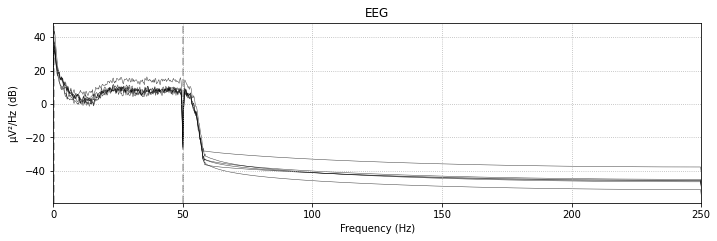

Opening raw-browser...


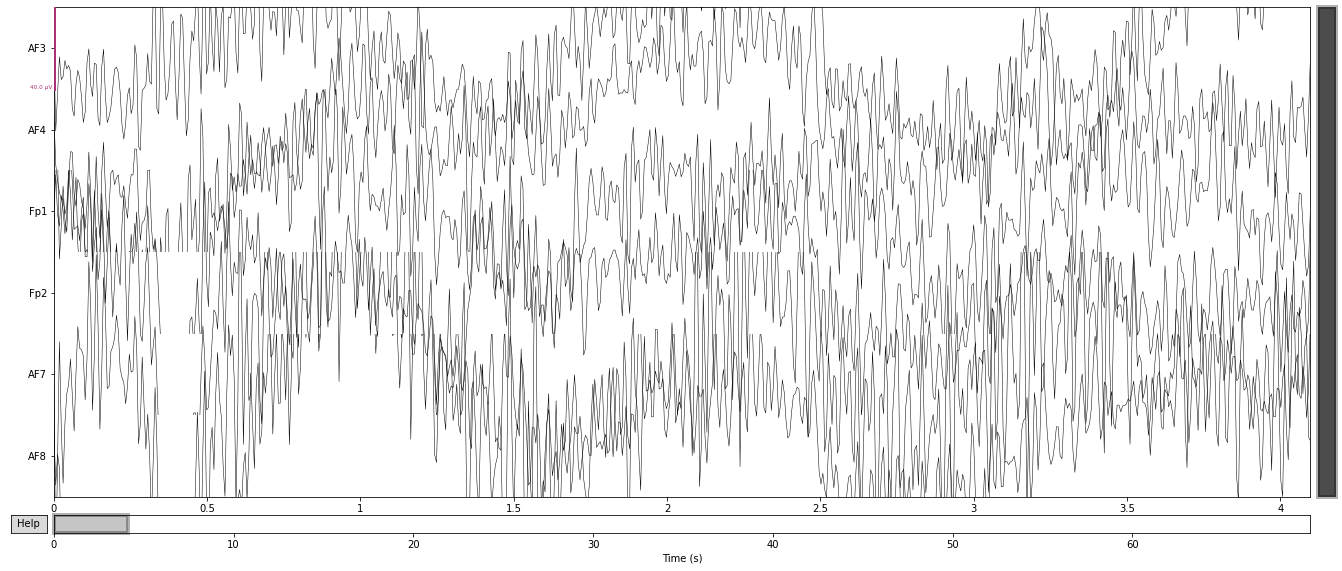

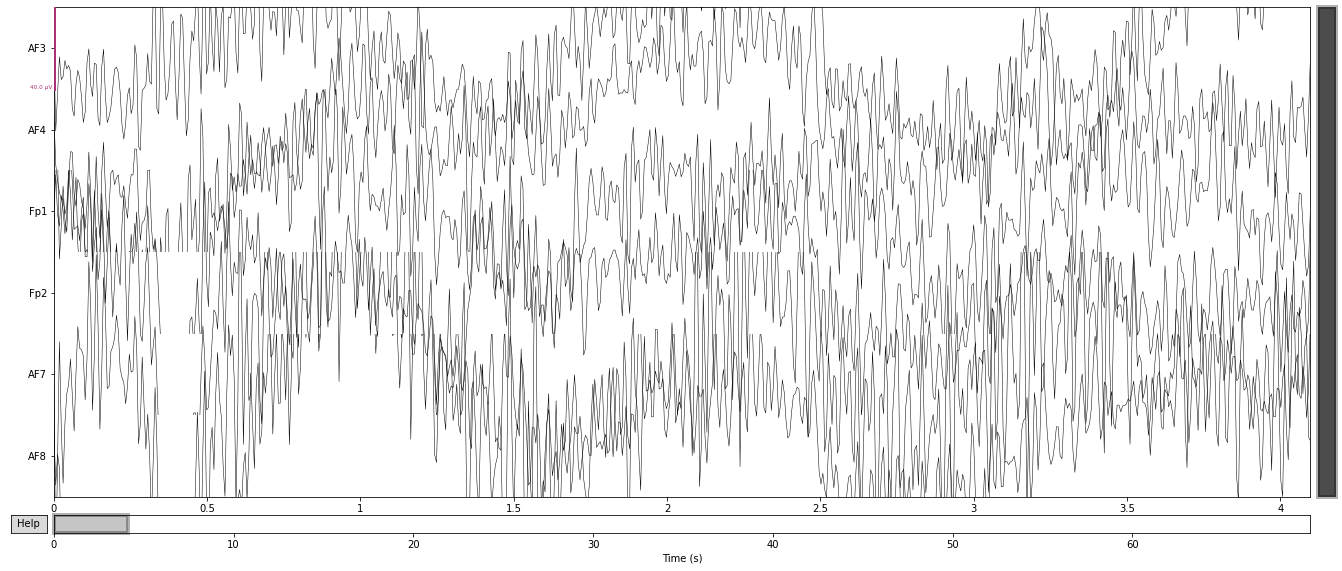

In [12]:
import mne
ch_names = ['AF3', 'AF4', 'Fp1', 'Fp2', 'AF7', 'AF8']
ch_types = ['eeg'] * 6
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=500)
simulated_raw = mne.io.RawArray(transposesig, info)

filtered=simulated_raw.notch_filter(50).filter(0.5, 50)
filtered.plot_psd()
filtered.plot(duration=4.096)
